In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic Dataset - Kaggle

In [56]:
df = pd.read_csv("../datasets/titanic/train.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


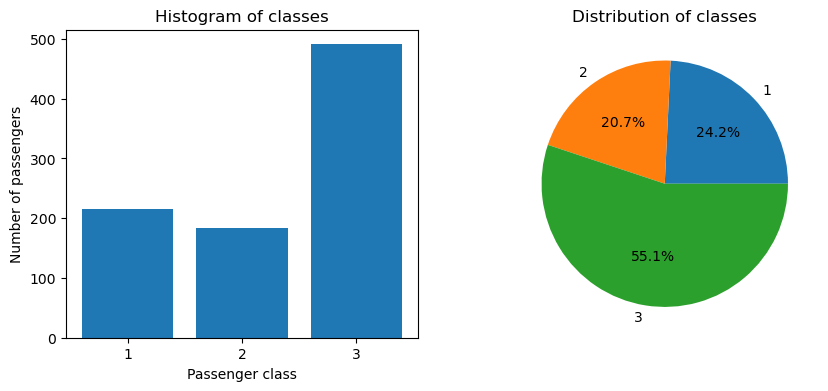

In [57]:
class_keys = ["1", "2", "3"]
class_vals = [len(df["Pclass"][df["Pclass"]==int(class_key)]) for class_key in class_keys]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(class_keys, class_vals)
plt.title("Histogram of classes")
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers")

plt.subplot(1,2,2)
plt.title("Distribution of classes")
plt.pie(class_vals, labels=class_keys, autopct='%1.1f%%')

plt.show()

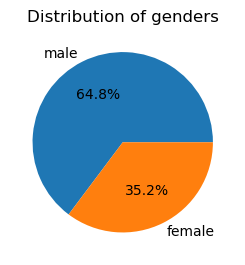

In [58]:
gender_keys = ["male", "female"]
gender_vals = [len(df["Sex"][df["Sex"]==gender]) for gender in gender_keys]

plt.subplot(1,2,1)
plt.title("Distribution of genders")
plt.pie(gender_vals, labels=gender_keys, autopct='%1.1f%%')
plt.show()

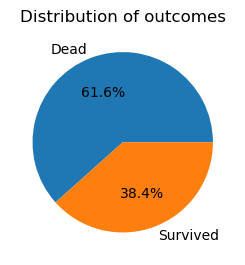

549 people died
342 people survived


In [59]:
outcome_keys = ["Dead", "Survived"]
outcome_vals = [len(df["Survived"][df["Survived"]==x]) for x in range(len(outcome_keys))]

plt.subplot(1,2,1)
plt.title("Distribution of outcomes")
plt.pie(outcome_vals, labels=outcome_keys, autopct='%1.1f%%')
plt.show()

print(f"{outcome_vals[0]} people died")
print(f"{outcome_vals[1]} people survived")

In [60]:
saved = np.zeros((2,3))
dead = np.zeros((2,3))

for i in range(len(df)):
    if df["Survived"][i+1]==1:
        saved[0 if df["Sex"][i+1]=="male" else 1, df["Pclass"][i+1]-1] += 1
    else:
        dead[0 if df["Sex"][i+1]=="male" else 1, df["Pclass"][i+1]-1] += 1
        
print("Saved : ")
print(saved)

print()
print("Dead : ")
print(dead)

Saved : 
[[45. 17. 47.]
 [91. 70. 72.]]

Dead : 
[[ 77.  91. 300.]
 [  3.   6.  72.]]


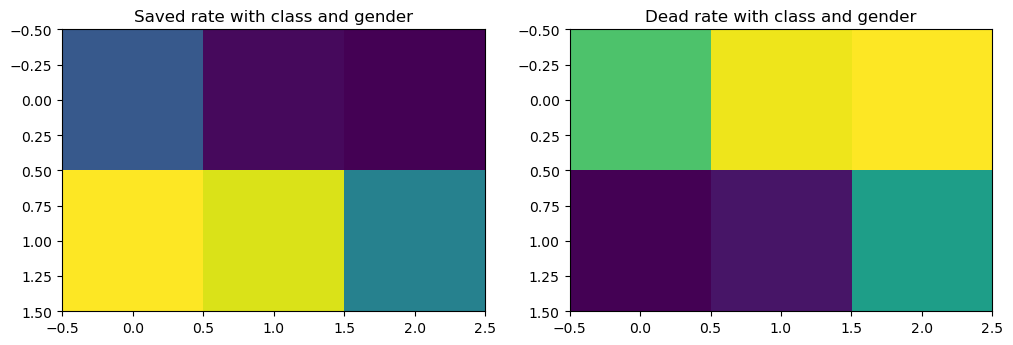

In [61]:
saved_norm = saved/(saved+dead)
dead_norm = dead/(saved+dead)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Saved rate with class and gender")
plt.imshow(saved_norm)

plt.subplot(1, 2, 2)
plt.title("Dead rate with class and gender")
plt.imshow(dead_norm)

plt.show()